Connected to base (Python 3.11.9)

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [ ]:
### making soup
url1 = 'https://oig.hhs.gov/fraud/enforcement'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.content, 'lxml')

In [ ]:
### find title of enforcements
li_blocks = soup1.find_all('h2') #h2 classes with nested 'a' titles. li_blocks[2:21] are the 20 ones
li_titles = []
for h2 in li_blocks:
    # Find all 'a' tags within each 'h2' element
    for a_tag in h2.find_all('a'):
        li_titles.append(a_tag)
li_titles[0:5]
df_title = pd.DataFrame(li_titles) # dataframe with titles
df_title.columns = ['title']

In [ ]:
### find date
span_blocks = soup1.find_all('span', attrs={'class': 'text-base-dark padding-right-105'})
span_blocks[0:5]
df_date = pd.DataFrame(span_blocks) 
df_date.columns = ['date']
#asked chat gpt 'how to i search for 'span' class with attribute xxx'

In [ ]:
### find category
li_blocks_dt = soup1.find_all('li', attrs={'class': 'display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1'})
li_blocks[0:5]
df_category = pd.DataFrame(li_blocks_dt)
df_category.columns = ['category']

In [ ]:
### find link
#use the list of titles from p1 and extract href
link_blocks = [link.get('href') for link in li_titles]
df_link = pd.DataFrame(link_blocks)
df_link.columns = ['link']
df_link['link'] = "https://oig.hhs.gov" + df_link['link']

In [ ]:
### combine dataframes
df_Q1 = pd.concat([df_title, df_date, df_category, df_link], axis=1)
df_Q1.head()

,title,date,category,link
0,Boise Nurse Practitioner Sentenced To 48 Month...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...
1,Former Traveling Nurse Pleads Guilty To Tamper...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...
2,Former Arlington Resident Sentenced To Prison ...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...
3,Paroled Felon Sentenced To Six Years For Fraud...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...
4,Former Licensed Counselor Sentenced For Defrau...,"November 6, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-l...


In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_date = datetime.now()
    current_page = 1
    results = []

    while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break

IndentationError: unexpected indent (<ipython-input-8-3746ae3cc8f7>, line 9)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

    while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break

IndentationError: unexpected indent (<ipython-input-9-fb8be2992779>, line 18)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

  while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

  while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break
      for title, date, category, link in zip(titles, dates, categories, links):
        results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})
      
      next_page = soup.find('a', text = 'Next')
      if next page:
        current_page += 1
      else:
        break

      time.sleep(1)
    scrapper = pd.DataFrame(results)
    
    df['Date'] = pd.to_datetime(df['Date'])
    start_date = datetime(start_year, start_month, 1)
    df = df[df['Date'] >= start_date]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 44)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

  while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break
      for title, date, category, link in zip(titles, dates, categories, links):
        results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})
      
      next_page = soup.find('a', text = 'Next')
      if next page:
        current_page += 1
      else:
        break

      time.sleep(1)
  scrapper = pd.DataFrame(results)

    df['Date'] = pd.to_datetime(df['Date'])
    start_date = datetime(start_year, start_month, 1)
    df = df[df['Date'] >= start_date]

SyntaxError: invalid syntax (<ipython-input-13-216d5b2bc749>, line 38)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

  while True:
      response = requests.get(base_url, params=params)
      soup = BeautifulSoup(response.content, 'lxml')
      titles = []
      links = []
      for h2 in soup.find_all('h2'):
        a_tag = h2.find('a')
        if a_tag:
          titles.append(a_tag.get_text(strip =True))
          links.append("https://oig.hhs.gov" + a_tag['href'])
      #dates    
      dates = [span.get_text(strip = True)for span in soup.find_all('span', class_='text-base-dark padding-right-105')] 
      #Categories
      categories = [li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')]
      if not titles:
        break
      for title, date, category, link in zip(titles, dates, categories, links):
        results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})
      
      next_page = soup.find('a', text = 'Next')
      if next page:
        current_page += 1
      else:
        break

      time.sleep(1)

  scrapper = pd.DataFrame(results)
  df['Date'] = pd.to_datetime(df['Date'])
  start_date = datetime(start_year, start_month, 1)
  df = df[df['Date'] >= start_date]

SyntaxError: invalid syntax (<ipython-input-14-eb1958930e86>, line 38)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
  if start_year < 2013:
    Print('please input date later than 2013')
    return

  base_url = 'https://oig.hhs.gov/fraud/enforcement'
  params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
  current_date = datetime.now()
  current_page = 1
  results = []

    while True:
        # Construct the URL with pagination
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
        
        # Extract titles and links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        # Extract dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        # Extract categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        # Check if data is found; if not, break the loop
        if not titles:
            break

        # Append results to the list
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        # Check for the "Next" button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        # Wait 1 second before the next request
        time.sleep(1)

    # Convert results to a DataFrame
    scrapper = pd.DataFrame(results)
  
  scrapper['Date'] = pd.to_datetime(scrapper['Date'])
  start_date = datetime(start_year, start_month, 1)
  scrapper = scrapper[scrapper['Date'] >= start_date]

IndentationError: unexpected indent (<ipython-input-15-55ea966249dd>, line 18)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
  
  scrapper['Date'] = pd.to_datetime(scrapper['Date'])
  start_date = datetime(start_year, start_month, 1)
  scrapper = scrapper[scrapper['Date'] >= start_date]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 54)

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]

In [ ]:
import time

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]

enforcement_scrapper(1, 2023)  

NameError: name 'datetime' is not defined

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]

enforcement_scrapper(1, 2023)  

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]

twenty_three= enforcement_scrapper(1, 2023)  

twenty_three.head

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]

twenty_three= enforcement_scrapper(1, 2023)  

twenty_three.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    params = {
        'searchby': 'monthyear',
        'month': start_month,
        'year': start_year,
    }
    current_page = 1
    results = []

    while True:
        response = requests.get(f"{base_url}?page={current_page}", params=params)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three= enforcement_scrapper(1, 2023)  

twenty_three.head()

,Title,Date,Category,Link
0,Pharmacist and Brother Convicted of $15M Medic...,2024-11-08,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...
1,Boise Nurse Practitioner Sentenced To 48 Month...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...
2,Former Traveling Nurse Pleads Guilty To Tamper...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...
3,Former Arlington Resident Sentenced To Prison ...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...
4,Paroled Felon Sentenced To Six Years For Fraud...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...


In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        if not titles:
            break
        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check for next button
        next_page = soup.find('a', text='Next')
        if next_page:
            current_page += 1
        else:
            break

        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

twenty_three.head()

,Title,Date,Category,Link
0,Pharmacist and Brother Convicted of $15M Medic...,2024-11-08,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...
1,Boise Nurse Practitioner Sentenced To 48 Month...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...
2,Former Traveling Nurse Pleads Guilty To Tamper...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...
3,Former Arlington Resident Sentenced To Prison ...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...
4,Paroled Felon Sentenced To Six Years For Fraud...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...


In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]


        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

twenty_three.head()

KeyError: 'Date'

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

twenty_three.head()

,Title,Date,Category,Link
0,Pharmacist and Brother Convicted of $15M Medic...,2024-11-08,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...
1,Boise Nurse Practitioner Sentenced To 48 Month...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...
2,Former Traveling Nurse Pleads Guilty To Tamper...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...
3,Former Arlington Resident Sentenced To Prison ...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...
4,Paroled Felon Sentenced To Six Years For Fraud...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...


In [ ]:
print(twenty_three.shape[0])

1534


In [ ]:
earliest_date = twenty_three['Date'].min()
print(f"Earliest Date: {earliest_date.date()}")

num_enforcements = len(twenty_three)
print(f"Number of Enforcement Actions: {num_enforcements}")

Earliest Date: 2023-01-03
Number of Enforcement Actions: 1534


In [ ]:
twenty_one = enforcement_scrapper(1, 2021)

num_enforcements = len(twenty_one)
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Name: 3021, dtype: object


In [ ]:
import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line().encode(
  x = alt.X('Month_Year:T', title = 'Month/Year')
  y = alt.Y('Count:Q', title = 'Number of Actions')
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)', width = 800,
height = 400)

line_agg

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-31-61bcb996d0c8>, line 7)

In [ ]:
import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line().encode(
  x = alt.X('Month_Year:T', title = 'Month/Year'),
  y = alt.Y('Count:Q', title = 'Number of Actions')
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)', width = 800,
height = 400)

line_agg

alt.Chart(...)

In [ ]:
import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line().encode(
  x = alt.X('Month_Year', title = 'Month/Year'),
  y = alt.Y('Count:Q', title = 'Number of Actions')
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)')

line_agg

alt.Chart(...)

In [ ]:
import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line().encode(
  x = alt.X('Month_Year', title = 'Month/Year'),
  y = alt.Y('Count:Q', title = 'Number of Actions'),
  tooltip=['Month_Year:T', 'Count:Q']
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)')

line_agg

alt.Chart(...)

In [ ]:
import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line(point = True).encode(
  x = alt.X('Month_Year', title = 'Month/Year'),
  y = alt.Y('Count:Q', title = 'Number of Actions'),
  tooltip=['Month_Year:T', 'Count:Q']
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)')

line_agg

alt.Chart(...)

In [ ]:
os.chidir('/Users/willsigal/Desktop')
districts_gdf = pd.read_csv('US_Attorney_Districts_Shapefile_simplified_20241108.csv')

: 

In [ ]:
os.chidir('/Users/willsigal/Desktop')
districts_gdf = pd.read_csv('US_Attorney_Districts_Shapefile_simplified_20241108.csv')

: 

In [ ]:
os.chidir('/Users/willsigal/Desktop')
districts_gdf = pd.read_csv('US_Attorney_Districts_Shapefile_simplified_20241108.csv')

AttributeError: module 'os' has no attribute 'chidir'

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [ ]:
os.chidir('/Users/willsigal/Desktop')
districts_gdf = pd.read_csv('US_Attorney_Districts_Shapefile_simplified_20241108.csv')

AttributeError: module 'os' has no attribute 'chidir'

In [ ]:
os.chdir('/Users/willsigal/Desktop')
districts_gdf = pd.read_csv('US_Attorney_Districts_Shapefile_simplified_20241108.csv')

In [ ]:
os.chdir('/Users/willsigal/Desktop')
import geopandas as gpd

In [ ]:
state = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

In [ ]:
state = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

state_geometries = state['geometry']

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
agencies = []
    for link in scrapper['Link']:
        try:
            detail_response = requests.get(link)
            detail_soup = BeautifulSoup(detail_response.content, 'lxml')
            # Extract agency info
            agency = detail_soup.find('span', text='Agency:').find_next('span').get_text(strip=True)
        except Exception as e:
            agency = None  # Handle missing agency info gracefully
            print(f"Failed to fetch agency info for {link}: {e}")
        agencies.append(agency)

        time.sleep(1)

    scrapper['Agency'] = agencies

    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

IndentationError: unexpected indent (<ipython-input-44-a48a569c31d0>, line 54)

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup


### making soup
url1 = 'https://oig.hhs.gov/fraud/enforcement'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.content, 'lxml')

### find title of enforcements
li_blocks = soup1.find_all('h2') #h2 classes with nested 'a' titles. li_blocks[2:21] are the 20 ones
li_titles = []
for h2 in li_blocks:
    # Find all 'a' tags within each 'h2' element
    for a_tag in h2.find_all('a'):
        li_titles.append(a_tag)
li_titles[0:5]
df_title = pd.DataFrame(li_titles) # dataframe with titles
df_title.columns = ['title']

### find date
span_blocks = soup1.find_all('span', attrs={'class': 'text-base-dark padding-right-105'})
span_blocks[0:5]
df_date = pd.DataFrame(span_blocks) 
df_date.columns = ['date']
#asked chat gpt 'how to i search for 'span' class with attribute xxx'

### find category
li_blocks_dt = soup1.find_all('li', attrs={'class': 'display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1'})
li_blocks[0:5]
df_category = pd.DataFrame(li_blocks_dt)
df_category.columns = ['category']

### find link
#use the list of titles from p1 and extract href
link_blocks = [link.get('href') for link in li_titles]
df_link = pd.DataFrame(link_blocks)
df_link.columns = ['link']
df_link['link'] = "https://oig.hhs.gov" + df_link['link']

### combine dataframes
df_Q1 = pd.concat([df_title, df_date, df_category, df_link], axis=1)
df_Q1.head()

#1) Check if the year if the year is 2013 or later if not, terminte function
#2) Create dictionary for params and use a while loop for pagnation setting for it to break when there's no next.
#3) Send Get request to get pages, dates, categories and links
#4) append new info to our dictionary
#5) wait one sec before going to the next page

import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles, links, dates, categories = [], [], [], []

        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates and categories
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break

        #Used chatgpt to rewrite this agency extraction, its a very long story but essentially, i had it intially going back through the scraper df and click pon each link and extract the agency, which worked. However, it took an hour
        for title, date, category, link in zip(titles, dates, categories, links):
            try:
                detail_response = requests.get(link)
                detail_soup = BeautifulSoup(detail_response.content, 'lxml')

                #get info on agency
                agency_label = detail_soup.find('span', text='Agency:')
                if agency_label and agency_label.next_sibling:
                    agency = agency_label.next_sibling.strip()
                else:
                    agency = None
            except Exception as e:
                agency = None
                print(f"Failed to fetch agency info for {link}: {e}")

            #append everything
            results.append({
                'Title': title,
                'Date': date,
                'Category': category,
                'Link': link,
                'Agency': agency
            })
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1
        time.sleep(.5)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    #Have to make this at the end as I messed up and didn't have it intially


    scrapper['Agency'] = agencies
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])


earliest_date = twenty_three['Date'].min()
print(f"Earliest Date: {earliest_date.date()}")

num_enforcements = len(twenty_three)
print(f"Number of Enforcement Actions: {num_enforcements}")

twenty_one = enforcement_scrapper(1, 2021)

num_enforcements = len(twenty_one)
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

import altair as alt

twenty_one['Month_Year'] = twenty_one['Date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = twenty_one.groupby('Month_Year').size().reset_index(name='Count')

line_agg = alt.Chart(monthly_counts).mark_line(point = True).encode(
  x = alt.X('Month_Year', title = 'Month/Year'),
  y = alt.Y('Count:Q', title = 'Number of Actions'),
  tooltip=['Month_Year:T', 'Count:Q']
).properties( title = 'Number of Enforcement Actions Over Time (Aggregated by Month-Year)')

line_agg

os.chdir('/Users/willsigal/Desktop')
import geopandas as gpd

state = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

state_geometries = state['geometry']

NameError: name 'agencies' is not defined

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [ ]:
### making soup
url1 = 'https://oig.hhs.gov/fraud/enforcement'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.content, 'lxml')

In [ ]:
### find title of enforcements
li_blocks = soup1.find_all('h2') #h2 classes with nested 'a' titles. li_blocks[2:21] are the 20 ones
li_titles = []
for h2 in li_blocks:
    # Find all 'a' tags within each 'h2' element
    for a_tag in h2.find_all('a'):
        li_titles.append(a_tag)
li_titles[0:5]
df_title = pd.DataFrame(li_titles) # dataframe with titles
df_title.columns = ['title']

In [ ]:
### find category
li_blocks_dt = soup1.find_all('li', attrs={'class': 'display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1'})
li_blocks[0:5]
df_category = pd.DataFrame(li_blocks_dt)
df_category.columns = ['category']

In [ ]:
### find link
#use the list of titles from p1 and extract href
link_blocks = [link.get('href') for link in li_titles]
df_link = pd.DataFrame(link_blocks)
df_link.columns = ['link']
df_link['link'] = "https://oig.hhs.gov" + df_link['link']

In [ ]:
### combine dataframes
df_Q1 = pd.concat([df_title, df_date, df_category, df_link], axis=1)
df_Q1.head()

,title,date,category,link
0,Pharmacist and Brother Convicted of $15M Medic...,"November 8, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...
1,Boise Nurse Practitioner Sentenced To 48 Month...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...
2,Former Traveling Nurse Pleads Guilty To Tamper...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...
3,Former Arlington Resident Sentenced To Prison ...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...
4,Paroled Felon Sentenced To Six Years For Fraud...,"November 7, 2024",Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...


In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles, links, dates, categories = [], [], [], []

        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates and categories
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break

        #Used chatgpt to rewrite this agency extraction, its a very long story but essentially, i had it intially going back through the scraper df and click pon each link and extract the agency, which worked. However, it took an hour
        for title, date, category, link in zip(titles, dates, categories, links):
            try:
                detail_response = requests.get(link)
                detail_soup = BeautifulSoup(detail_response.content, 'lxml')
            #append everything
            results.append({
                'Title': title,
                'Date': date,
                'Category': category,
                'Link': link
            })
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1
        time.sleep(.5)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    #Have to make this at the end as I messed up and didn't have it intially


    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

SyntaxError: expected 'except' or 'finally' block (<ipython-input-59-83f057ec03d3>, line 41)

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles, links, dates, categories = [], [], [], []

        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates and categories
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break

        #Used chatgpt to rewrite this agency extraction, its a very long story but essentially, i had it intially going back through the scraper df and click pon each link and extract the agency, which worked. However, it took an hour
        
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1
        time.sleep(.5)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    #Have to make this at the end as I messed up and didn't have it intially
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

KeyError: 'Date'

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

: 

In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

1534


In [ ]:
earliest_date = twenty_three['Date'].min()
print(f"Earliest Date: {earliest_date.date()}")

num_enforcements = len(twenty_three)
print(f"Number of Enforcement Actions: {num_enforcements}")

Earliest Date: 2023-01-03
Number of Enforcement Actions: 1534


In [ ]:
twenty_one = enforcement_scrapper(1, 2021)

num_enforcements = len(twenty_one)
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Name: 3021, dtype: object


In [ ]:
twenty_one = enforcement_scrapper(1, 2021)

num_enforcements = len(twenty_one)
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Name: 3021, dtype: object


In [ ]:
import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        #Used chatgpt to debug my code here. I was using next button as a signal for some reason and switched that to instead using a date chack and the url pattern
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])

1534


In [ ]:
import concurrent.futures

session = requests.Session()

# Initialize agencies list
agencies = []

# Iterate over links
for link in twenty_one['Link']:
    try:
        # Send GET request
        response = session.get(link)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Parse HTML
        detail_soup = BeautifulSoup(response.content, 'lxml')

        # Find agency label
        agency_label = detail_soup.find('span', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None

    except requests.exceptions.RequestException as e:
        agency = None
        print(f"Couldn't fetch info for {link}: {e}")
    except Exception as e:
        agency = None
        print(f"Unexpected error for {link}: {e}")

    agencies.append(agency)
    time.sleep(0.5)  # Consider using a more efficient delay method

twenty_one['Agency'] = agencies
return twenty_one

In [ ]:
import concurrent.futures

session = requests.Session()

# Initialize agencies list
agencies = []

# Iterate over links
for link in twenty_one['Link']:
    try:
        # Send GET request
        response = session.get(link)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Parse HTML
        detail_soup = BeautifulSoup(response.content, 'lxml')

        # Find agency label
        agency_label = detail_soup.find('span', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None

    except requests.exceptions.RequestException as e:
        agency = None
        print(f"Couldn't fetch info for {link}: {e}")
    except Exception as e:
        agency = None
        print(f"Unexpected error for {link}: {e}")

    agencies.append(agency)
    time.sleep(0.5)  # Consider using a more efficient delay method

twenty_one['Agency'] = agencies
return twenty_one

In [ ]:
import concurrent.futures

session = requests.Session()

# Initialize agencies list
agencies = []

# Iterate over links
for link in twenty_one['Link']:
    try:
        # Send GET request
        response = session.get(link)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Parse HTML
        detail_soup = BeautifulSoup(response.content, 'lxml')

        # Find agency label
        agency_label = detail_soup.find('span', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None

    except requests.exceptions.RequestException as e:
        agency = None
        print(f"Couldn't fetch info for {link}: {e}")
    except Exception as e:
        agency = None
        print(f"Unexpected error for {link}: {e}")

    agencies.append(agency)
    time.sleep(0.5)  # Consider using a more efficient delay method

twenty_one['Agency'] = agencies
return twenty_one

Connected to base (Python 3.11.9)

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import concurrent.futures

In [ ]:
import concurrent.futures
def scrape_link(link):
    try:
        response = requests.get(link)
        detail_soup = BeautifulSoup(response.content, 'lxml')
        agency_label = detail_soup.find('span', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None
        return agency
    except Exception as e:
        print(f"Error scraping {link}: {e}")
        return None

def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(scrape_link, link): link for link in twenty_one['Link']}
        agencies = [future.result() for future in futures]

    twenty_one['Agency'] = agencies
    return twenty_one

main()

NameError: name 'twenty_one' is not defined

In [ ]:
### SETUP 
import pandas as pd
import altair as alt
import time
import os
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import concurrent.futures


### making soup
url1 = 'https://oig.hhs.gov/fraud/enforcement'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.content, 'lxml')

### find title of enforcements
li_blocks = soup1.find_all('h2') #h2 classes with nested 'a' titles. li_blocks[2:21] are the 20 ones
li_titles = []
for h2 in li_blocks:
    # Find all 'a' tags within each 'h2' element
    for a_tag in h2.find_all('a'):
        li_titles.append(a_tag)
li_titles[0:5]
df_title = pd.DataFrame(li_titles) # dataframe with titles
df_title.columns = ['title']

### find date
span_blocks = soup1.find_all('span', attrs={'class': 'text-base-dark padding-right-105'})
span_blocks[0:5]
df_date = pd.DataFrame(span_blocks) 
df_date.columns = ['date']
#asked chat gpt 'how to i search for 'span' class with attribute xxx'

### find category
li_blocks_dt = soup1.find_all('li', attrs={'class': 'display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1'})
li_blocks[0:5]
df_category = pd.DataFrame(li_blocks_dt)
df_category.columns = ['category']

### find link
#use the list of titles from p1 and extract href
link_blocks = [link.get('href') for link in li_titles]
df_link = pd.DataFrame(link_blocks)
df_link.columns = ['link']
df_link['link'] = "https://oig.hhs.gov" + df_link['link']

### combine dataframes
df_Q1 = pd.concat([df_title, df_date, df_category, df_link], axis=1)
df_Q1.head()

#1) Check if the year if the year is 2013 or later if not, terminte function
#2) Create dictionary for params and use a while loop for pagnation setting for it to break when there's no next.
#3) Send Get request to get pages, dates, categories and links
#4) append new info to our dictionary
#5) wait one sec before going to the next page

import time
from datetime import datetime

def enforcement_scrapper(start_month, start_year):
    if start_year < 2013:
        print("Please input a year >= 2013, as enforcement actions before 2013 are unavailable.")
        return

    base_url = 'https://oig.hhs.gov/fraud/enforcement'
    current_page = 1
    results = []

    while True:
        url = f"{base_url}/?page={current_page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
#titles links
        titles = []
        links = []
        for h2 in soup.find_all('h2'):
            a_tag = h2.find('a')
            if a_tag:
                titles.append(a_tag.get_text(strip=True))
                links.append("https://oig.hhs.gov" + a_tag['href'])

        #get dates
        dates = [span.get_text(strip=True) for span in soup.find_all('span', class_='text-base-dark padding-right-105')]

        #get categories
        categories = [
            li.get_text(strip=True) for li in soup.find_all('li', class_='display-inline-block usa-tag text-no-lowercase text-base-darkest bg-base-lightest margin-right-1')
        ]

        for title, date, category, link in zip(titles, dates, categories, links):
            results.append({'Title': title, 'Date': date, 'Category': category, 'Link': link})

        #check if page has dates earlier than when we're looking
        date_check = pd.to_datetime(dates, errors='coerce')
        if date_check.min() < pd.Timestamp(datetime(start_year, start_month, 1)):
            break
        
        current_page += 1


        
        time.sleep(1)

    
    scrapper = pd.DataFrame(results)
    scrapper['Date'] = pd.to_datetime(scrapper['Date'])
    start_date = datetime(start_year, start_month, 1)
    scrapper = scrapper[scrapper['Date'] >= start_date]
    return scrapper
twenty_three = enforcement_scrapper(1, 2023)  

print(twenty_three.shape[0])


earliest_date = twenty_three['Date'].min()
print(f"Earliest Date: {earliest_date.date()}")

num_enforcements = len(twenty_three)
print(f"Number of Enforcement Actions: {num_enforcements}")

twenty_one = enforcement_scrapper(1, 2021)

num_enforcements = len(twenty_one)
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

1534
Earliest Date: 2023-01-03
Number of Enforcement Actions: 1534
Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Name: 3021, dtype: object


In [ ]:
import concurrent.futures
def scrape_link(link):
    try:
        response = requests.get(link)
        detail_soup = BeautifulSoup(response.content, 'lxml')
        agency_label = detail_soup.find('span', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None
        return agency
    except Exception as e:
        print(f"Error scraping {link}: {e}")
        return None

def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(scrape_link, link): link for link in twenty_one['Link']}
        agencies = [future.result() for future in futures]

    twenty_one['Agency'] = agencies
    return twenty_one

main()

,Title,Date,Category,Link,Agency
0,Pharmacist and Brother Convicted of $15M Medic...,2024-11-08,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...,Agency:
1,Boise Nurse Practitioner Sentenced To 48 Month...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...,Agency:
2,Former Traveling Nurse Pleads Guilty To Tamper...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...,Agency:
3,Former Arlington Resident Sentenced To Prison ...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...,Agency:
4,Paroled Felon Sentenced To Six Years For Fraud...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...,Agency:
...,...,...,...,...,...
3017,Anchorage Doctor Sentenced For Prescribing Med...,2021-01-06,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/anchorag...,Agency:
3018,California Genetic Testing Lab Agrees to Pay $...,2021-01-06,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/californ...,Agency:
3019,Barrington Terrace of Boynton Beach Agreed to ...,2021-01-06,Fraud Self-Disclosures,https://oig.hhs.gov/fraud/enforcement/barringt...,None
3020,Camden County Man Admits Trafficking in Oxycod...,2021-01-05,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/camden-c...,Agency:


In [ ]:
#my code was taking me far far too long and so I used chat gpt to find how I can increase the speed of my crawler
import concurrent.futures
def scrape_link(link):
    try:
        response = requests.get(link)
        detail_soup = BeautifulSoup(response.content, 'lxml')
        agency_label = detail_soup.find('span', class_='padding-right-2 text-base', text='Agency:')
        agency = agency_label.find_next(text=True).strip() if agency_label else None
        return agency
    except Exception as e:
        print(f"Error scraping {link}: {e}")
        return None

def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(scrape_link, link): link for link in twenty_one['Link']}
        agencies = [future.result() for future in futures]

    twenty_one['Agency'] = agencies
    return twenty_one

main()

,Title,Date,Category,Link,Agency
0,Pharmacist and Brother Convicted of $15M Medic...,2024-11-08,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/pharmaci...,Agency:
1,Boise Nurse Practitioner Sentenced To 48 Month...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/boise-nu...,Agency:
2,Former Traveling Nurse Pleads Guilty To Tamper...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-t...,Agency:
3,Former Arlington Resident Sentenced To Prison ...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/former-a...,Agency:
4,Paroled Felon Sentenced To Six Years For Fraud...,2024-11-07,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/paroled-...,Agency:
...,...,...,...,...,...
3017,Anchorage Doctor Sentenced For Prescribing Med...,2021-01-06,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/anchorag...,Agency:
3018,California Genetic Testing Lab Agrees to Pay $...,2021-01-06,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/californ...,Agency:
3019,Barrington Terrace of Boynton Beach Agreed to ...,2021-01-06,Fraud Self-Disclosures,https://oig.hhs.gov/fraud/enforcement/barringt...,None
3020,Camden County Man Admits Trafficking in Oxycod...,2021-01-05,Criminal and Civil Actions,https://oig.hhs.gov/fraud/enforcement/camden-c...,Agency:


In [ ]:
#my code was taking me far far too long and so I used chat gpt to find how I can increase the speed of my crawler
import concurrent.futures
def scrape_link(link):
    try:
        response = requests.get(link)
        detail_soup = BeautifulSoup(response.content, 'lxml')
        agency_label = detail_soup.find('span', class_='padding-right-2 text-base', text='Agency:')
        if agency_label:
            # Get the actual text that follows the Agency: label
            agency_text = agency_label.next_sibling
            if agency_text:
                return agency_text.strip()
        return None
    except Exception as e:
        print(f"Error scraping {link}: {e}")
        return None

def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(scrape_link, link): link for link in twenty_one['Link']}
        agencies = [future.result() for future in futures]

    twenty_one['Agency'] = agencies
    return twenty_one

results = main()

Error scraping https://oig.hhs.gov/fraud/enforcement/attorney-general-cameron-announces-investigation-prosecution-by-his-office-leads-to-conviction-of-laurel-county-woman-for-medicaid-fraud/: HTTPSConnectionPool(host='oig.hhs.gov', port=443): Read timed out. (read timeout=None)
Error scraping https://oig.hhs.gov/fraud/enforcement/raleigh-county-man-sentenced-for-conspiracy-to-obstruct-justice-defendant-sentenced-for-conspiracy-to-fake-his-wifes-death-at-the-new-river-gorge/: HTTPSConnectionPool(host='oig.hhs.gov', port=443): Max retries exceeded with url: /fraud/enforcement/raleigh-county-man-sentenced-for-conspiracy-to-obstruct-justice-defendant-sentenced-for-conspiracy-to-fake-his-wifes-death-at-the-new-river-gorge/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x176d25d90>, 'Connection to oig.hhs.gov timed out. (connect timeout=None)'))


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
print(f"Number of Enforcement Actions: {num_enforcements}")

earliest_action = twenty_one.loc[twenty_one['Date'].idxmin()]
earliest_date = earliest_action['Date']
print(f"Earliest Date: {earliest_date.date()}")
print("Details of the Earliest Enforcement Action:")
print(earliest_action)

Number of Enforcement Actions: 3022
Earliest Date: 2021-01-04
Details of the Earliest Enforcement Action:
Title       The United States And Tennessee Resolve Claims...
Date                                      2021-01-04 00:00:00
Category                           Criminal and Civil Actions
Link        https://oig.hhs.gov/fraud/enforcement/the-unit...
Agency      U.S. Attorney's Office, Middle District of Ten...
Name: 3021, dtype: object


In [ ]:
state = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

state_geometries = state['geometry']

DataSourceError: cb_2018_us_state_500k/cb_2018_us_state_500k.shp: No such file or directory

In [ ]:
os.chdir('/Users/willsigal/Desktop')
import geopandas as gpd

In [ ]:
state = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

state_geometries = state['geometry']

In [ ]:
os.chdir('/Users/willsigal/Desktop/US Attorney Districts Shapefile simplified_20241108')
districts_gdf = pd.read_file('geo_export_6b570657-b5c6-4bbc-b83a-415e4880d085.shp')

AttributeError: module 'pandas' has no attribute 'read_file'

In [ ]:
os.chdir('/Users/willsigal/Desktop/US Attorney Districts Shapefile simplified_20241108')
districts_gdf = gpd.read_file('geo_export_6b570657-b5c6-4bbc-b83a-415e4880d085.shp')

In [ ]:
district_df = twenty_one[twenty_one['Agency'].str.contains('District', na=False)].copy()
district_df.head

<bound method NDFrame.head of                                                   Title       Date  \
1     Boise Nurse Practitioner Sentenced To 48 Month... 2024-11-07   
2     Former Traveling Nurse Pleads Guilty To Tamper... 2024-11-07   
3     Former Arlington Resident Sentenced To Prison ... 2024-11-07   
4     Paroled Felon Sentenced To Six Years For Fraud... 2024-11-07   
5     Former Licensed Counselor Sentenced For Defrau... 2024-11-06   
...                                                 ...        ...   
3016  Ex-Indian Health Services doctor sentenced to ... 2021-01-07   
3017  Anchorage Doctor Sentenced For Prescribing Med... 2021-01-06   
3018  California Genetic Testing Lab Agrees to Pay $... 2021-01-06   
3020  Camden County Man Admits Trafficking in Oxycod... 2021-01-05   
3021  The United States And Tennessee Resolve Claims... 2021-01-04   

                        Category  \
1     Criminal and Civil Actions   
2     Criminal and Civil Actions   
3     Criminal and Ci

In [ ]:
os.chdir('/Users/willsigal/Desktop/US Attorney Districts Shapefile simplified_20241108')
districts_gdf = gpd.read_file('geo_export_6b570657-b5c6-4bbc-b83a-415e4880d085.shp')

district_df = pd.DataFrame(districts_gdf)

In [ ]:
district_twentyone_df = twenty_one[twenty_one['Agency'].str.contains('District', na=False)].copy()
district_df.head

<bound method NDFrame.head of    statefp                             judicial_d         aland        awater  \
0       21           Western District of Kentucky  4.970555e+10  1.651516e+09   
1       21           Eastern District of Kentucky  5.257394e+10  7.238213e+08   
2       18           Southern District of Indiana  5.824517e+10  5.941176e+08   
3       01             Middle District of Alabama  3.412673e+10  5.472423e+08   
4       01           Southern District of Alabama  6.235882e+10  3.052681e+09   
..     ...                                    ...           ...           ...   
89      69  District of Northern Marianas Islands  4.722925e+08  4.644252e+09   
90      12           Southern District of Florida  2.448809e+10  1.159277e+10   
91      40          Northern District of Oklahoma  2.231989e+10  7.189768e+08   
92      50                    District of Vermont  2.387418e+10  1.030417e+09   
93      10                   District of Delaware  5.045926e+09  1.399986e+09  

In [ ]:
os.chdir('/Users/willsigal/Desktop/US Attorney Districts Shapefile simplified_20241108')
districts_gdf = gpd.read_file('geo_export_6b570657-b5c6-4bbc-b83a-415e4880d085.shp')

district_df = pd.DataFrame(districts_gdf)

In [ ]:
district_df.head
district_twentyone_df.head

<bound method NDFrame.head of                                                   Title       Date  \
1     Boise Nurse Practitioner Sentenced To 48 Month... 2024-11-07   
2     Former Traveling Nurse Pleads Guilty To Tamper... 2024-11-07   
3     Former Arlington Resident Sentenced To Prison ... 2024-11-07   
4     Paroled Felon Sentenced To Six Years For Fraud... 2024-11-07   
5     Former Licensed Counselor Sentenced For Defrau... 2024-11-06   
...                                                 ...        ...   
3016  Ex-Indian Health Services doctor sentenced to ... 2021-01-07   
3017  Anchorage Doctor Sentenced For Prescribing Med... 2021-01-06   
3018  California Genetic Testing Lab Agrees to Pay $... 2021-01-06   
3020  Camden County Man Admits Trafficking in Oxycod... 2021-01-05   
3021  The United States And Tennessee Resolve Claims... 2021-01-04   

                        Category  \
1     Criminal and Civil Actions   
2     Criminal and Civil Actions   
3     Criminal and Ci

In [ ]:
district_twentyone_df['District'] = district_twentyone_df['Agency'].apply(lambda x: x.split(', ')[-1] if ', ' in x else x)

# Remove leading/trailing whitespace
district_twentyone_df['District'] = district_twentyone_df['District'].str.strip()

# Remove "U.S. Attorney's Office, " prefix if present
district_twentyone_df['District'] = district_twentyone_df['District'].str.replace('U.S. Attorney\'s Office, ', '')

print(district_twentyone_df['District'])

1                  District of Idaho
2          District of Massachusetts
3       Eastern District of Virginia
4         Middle District of Florida
5          Western District of Texas
                    ...             
3016             District of Montana
3017              District of Alaska
3018          District of New Jersey
3020          District of New Jersey
3021    Middle District of Tennessee
Name: District, Length: 1412, dtype: object


In [ ]:
#removing the prefixes
district_twentyone_df['District'] = district_twentyone_df['Agency'].apply(lambda x: x.split(', ')[-1] if ', ' in x else x)
district_twentyone_df['District'] = district_twentyone_df['District'].str.strip()

district_twentyone_df['District'] = district_twentyone_df['District'].str.replace('U.S. Attorney\'s Office, ', '')

district_twentyone_df['District'].head

<bound method NDFrame.head of 1                  District of Idaho
2          District of Massachusetts
3       Eastern District of Virginia
4         Middle District of Florida
5          Western District of Texas
                    ...             
3016             District of Montana
3017              District of Alaska
3018          District of New Jersey
3020          District of New Jersey
3021    Middle District of Tennessee
Name: District, Length: 1412, dtype: object>

In [ ]:
district_df.head

<bound method NDFrame.head of    statefp                             judicial_d         aland        awater  \
0       21           Western District of Kentucky  4.970555e+10  1.651516e+09   
1       21           Eastern District of Kentucky  5.257394e+10  7.238213e+08   
2       18           Southern District of Indiana  5.824517e+10  5.941176e+08   
3       01             Middle District of Alabama  3.412673e+10  5.472423e+08   
4       01           Southern District of Alabama  6.235882e+10  3.052681e+09   
..     ...                                    ...           ...           ...   
89      69  District of Northern Marianas Islands  4.722925e+08  4.644252e+09   
90      12           Southern District of Florida  2.448809e+10  1.159277e+10   
91      40          Northern District of Oklahoma  2.231989e+10  7.189768e+08   
92      50                    District of Vermont  2.387418e+10  1.030417e+09   
93      10                   District of Delaware  5.045926e+09  1.399986e+09  

In [ ]:
enforcement_counts = district_twentyone_df['District'].value_counts().reset_index()
enforcement_counts.columns = ['District', 'Enforcement Actions']

In [ ]:
merged_districts_df = pd.merge(district_df, enforcement_counts, left_on='Judicial_d', right_on='District', how='left')

KeyError: 'Judicial_d'

In [ ]:
merged_districts_df = pd.merge(district_df, enforcement_counts, left_on='judicial_d', right_on='District', how='left')

In [ ]:
merged_districts_df = pd.merge(district_df, enforcement_counts, left_on='judicial_d', right_on='District', how='left')

merged_districts_df['Enforcement Actions'] = merged_districts_df['Enforcement Actions'].fillna(0)

NameError: name 'merged_df' is not defined

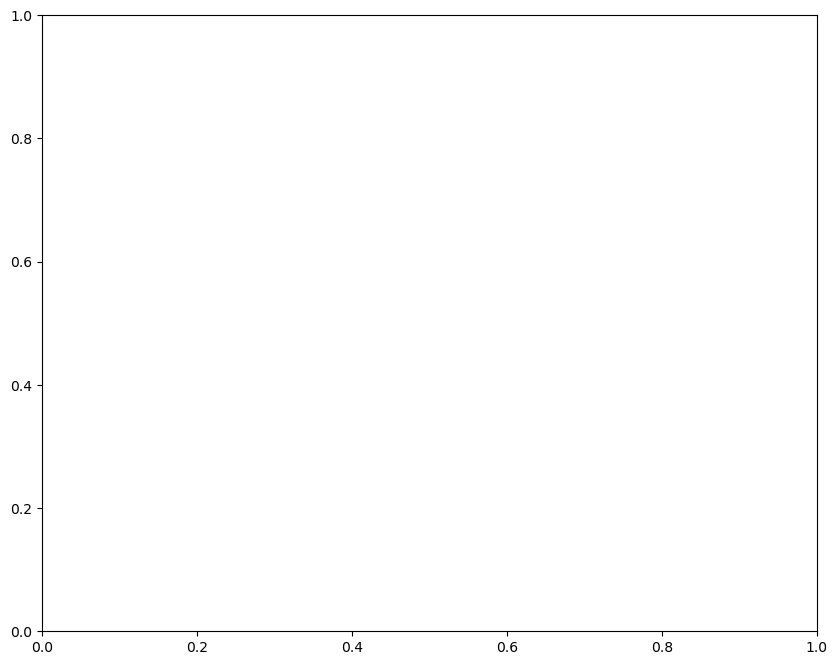

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by District')
plt.show()

In [ ]:
merged_districts_df = pd.merge(district_df, enforcement_counts, left_on='judicial_d', right_on='District', how='left')

merged_districts_df['Enforcement Actions'] = merged_districts_df['Enforcement Actions'].fillna(0)
merged_districts_df.columns

Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry', 'District',
       'Enforcement Actions'],
      dtype='object')

NameError: name 'merged_df' is not defined

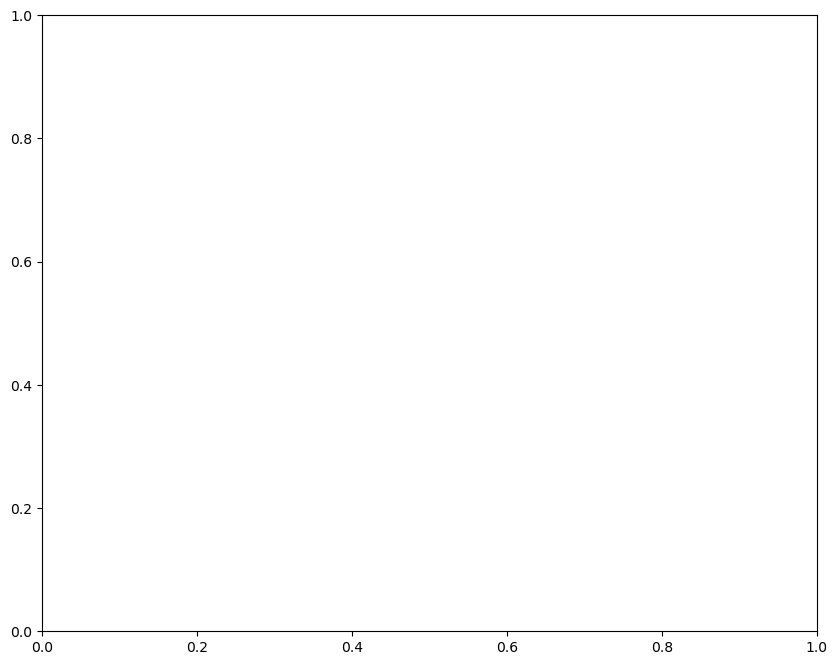

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax, legend_kwds={'label': 'Enforcement Actions'})
ax.set_title('Enforcement Actions by Judicial District')
ax.set_xlabel('')
ax.set_ylabel('')
plt.axis('off')  # Remove axis
plt.show()

In [ ]:
print(merged_df['geometry'].head())

NameError: name 'merged_df' is not defined

AttributeError: Line2D.set() got an unexpected keyword argument 'legend_kwds'

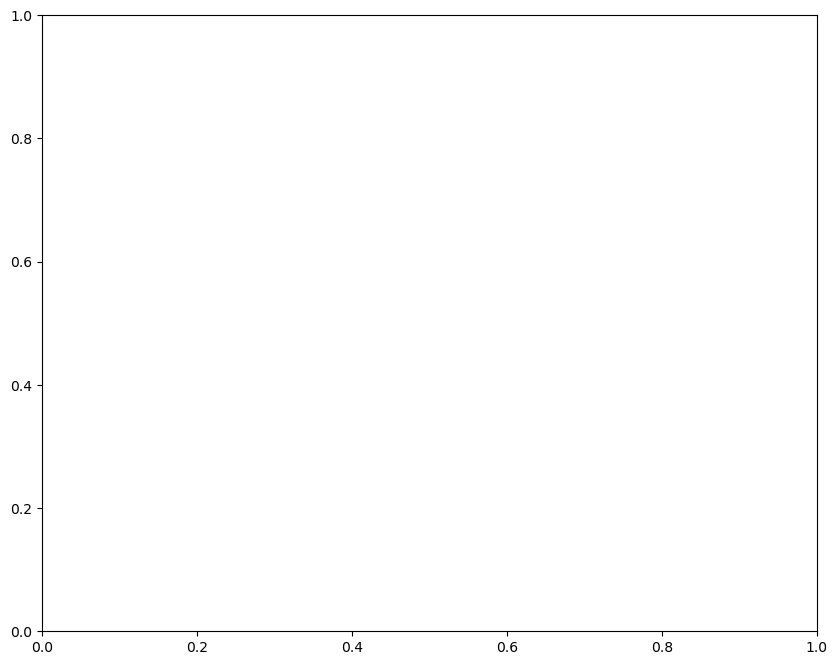

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
merged_districts_df.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax, legend_kwds={'label': 'Enforcement Actions'})
ax.set_title('Enforcement Actions by Judicial District')
ax.set_xlabel('')
ax.set_ylabel('')
plt.axis('off')  # Remove axis
plt.show()

In [ ]:
print(merged_df['geometry'].head())

NameError: name 'merged_df' is not defined

In [ ]:
print(merged_districts_df['geometry'].head())

0    MULTIPOLYGON (((-89.48248 36.50214, -89.48543 ...
1    POLYGON ((-84.62012 39.07346, -84.60793 39.073...
2    POLYGON ((-85.86281 40.46476, -85.86212 40.406...
3    POLYGON ((-85.33828 33.49471, -85.33396 33.492...
4    MULTIPOLYGON (((-88.08682 30.25987, -88.07676 ...
Name: geometry, dtype: geometry


In [ ]:
print(merged_districts_df['geometry'].head())
print(merged_districts_df.crs)
print(merged_districts_df['Enforcement Actions'].dtype)
print(merged_districts_df['Enforcement Actions'].isnull().sum())

0    MULTIPOLYGON (((-89.48248 36.50214, -89.48543 ...
1    POLYGON ((-84.62012 39.07346, -84.60793 39.073...
2    POLYGON ((-85.86281 40.46476, -85.86212 40.406...
3    POLYGON ((-85.33828 33.49471, -85.33396 33.492...
4    MULTIPOLYGON (((-88.08682 30.25987, -88.07676 ...
Name: geometry, dtype: geometry


AttributeError: 'DataFrame' object has no attribute 'crs'

In [ ]:
gdf = gpd.GeoDataFrame(merged_districts_df, geometry='geometry')

In [ ]:
gdf = gpd.GeoDataFrame(merged_districts_df, geometry='geometry')
print(gdf.crs)

EPSG:4326


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

: 

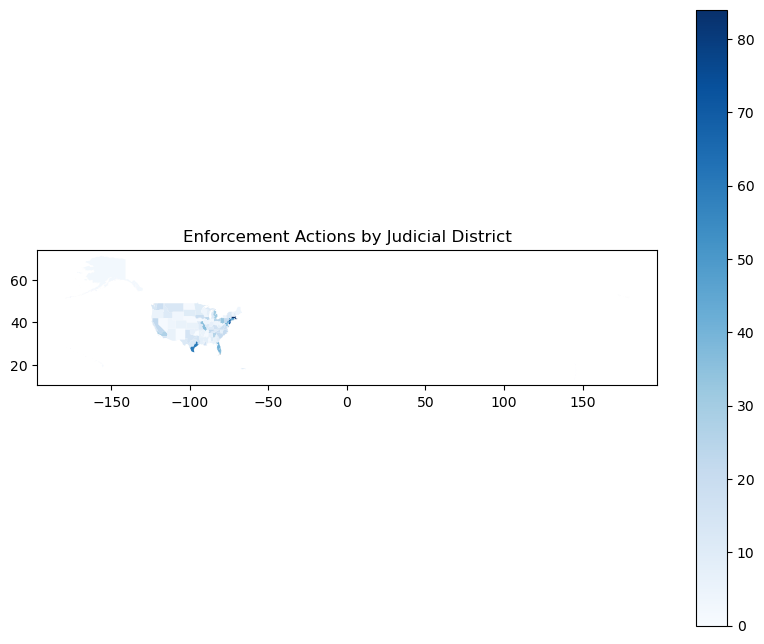

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

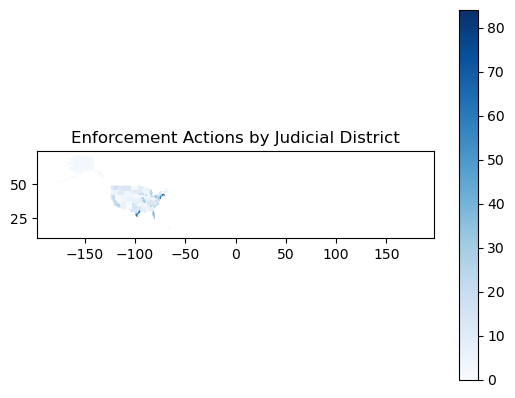

In [ ]:
fig, ax = plt.subplots()
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

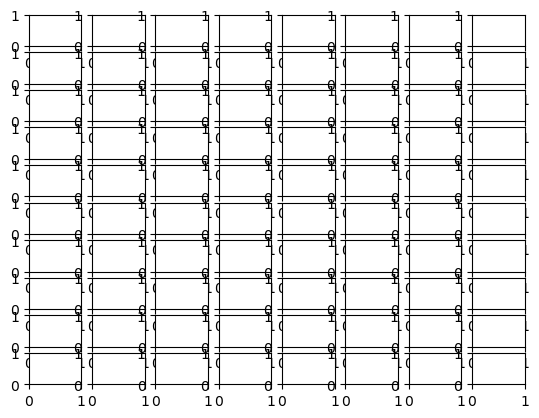

In [ ]:
fig, ax = plt.subplots(10, 8)
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

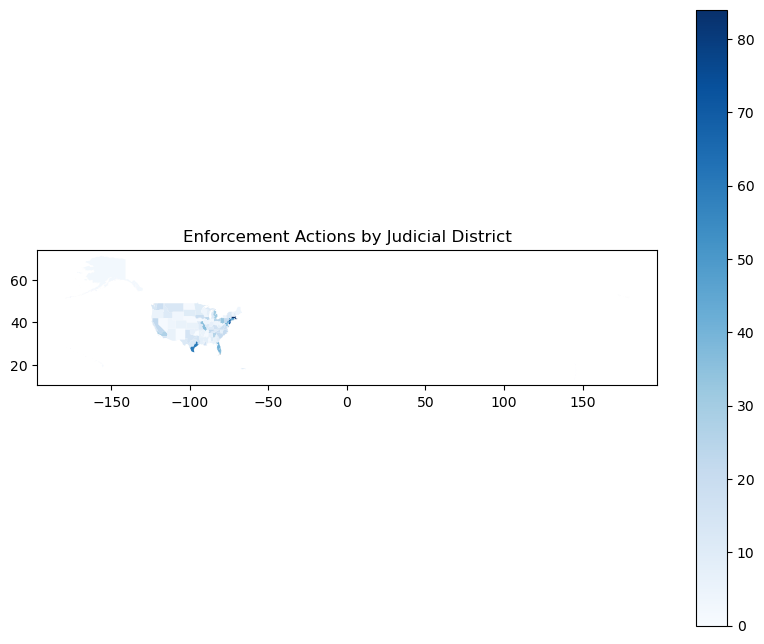

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

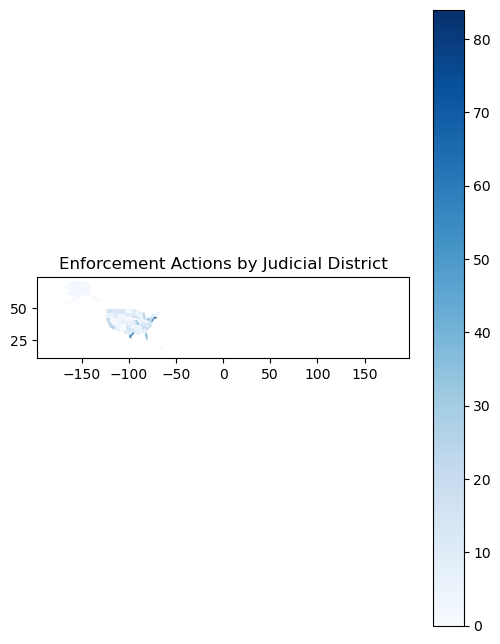

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

TypeError: Colorbar.__init__() got an unexpected keyword argument 'loc'

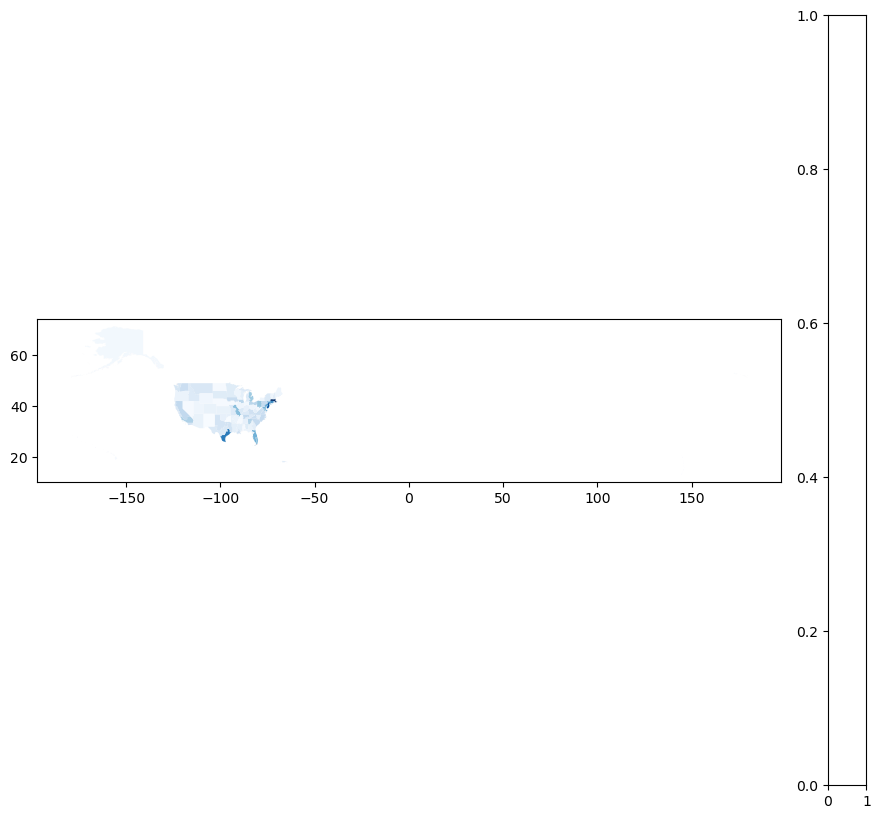

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax, legend_kwds={'loc': 'lower right', 'bbox_to_anchor': (1.05, 0.1)})  # Move legend
ax.set_title('Enforcement Actions by Judicial District')
ax.axis('off')  # Remove axis
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout
plt.show()

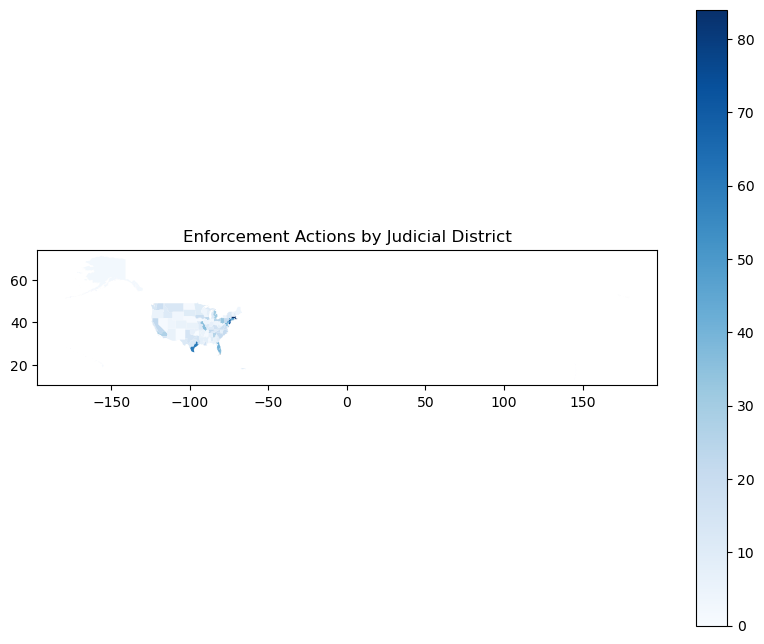

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Enforcement Actions', cmap='Blues', legend=True, ax=ax)
ax.set_title('Enforcement Actions by Judicial District')
plt.show()

In [ ]:
gdf = gpd.GeoDataFrame(merged_districts_df, geometry='geometry')
print(gdf.crs)

EPSG:4326


In [ ]:
gdf = gpd.GeoDataFrame(merged_districts_df, geometry='geometry')
print(gdf.crs)
print(gdf.isnull().sum())  # Ensure no missing values in 'Enforcement Actions'

EPSG:4326
statefp                0
judicial_d             0
aland                  0
awater                 0
state                  0
chief_judg             0
nominating             0
term_as_ch             0
shape_leng             0
shape_area             0
abbr                   0
district_n             0
shape__are             0
shape__len             0
geometry               0
District               6
Enforcement Actions    0
dtype: int64


In [ ]:
gdf = gpd.GeoDataFrame(merged_districts_df, geometry='geometry')
print(gdf.crs)
gdf['Enforcement Actions'] = gdf['Enforcement Actions'].fillna(0)

EPSG:4326


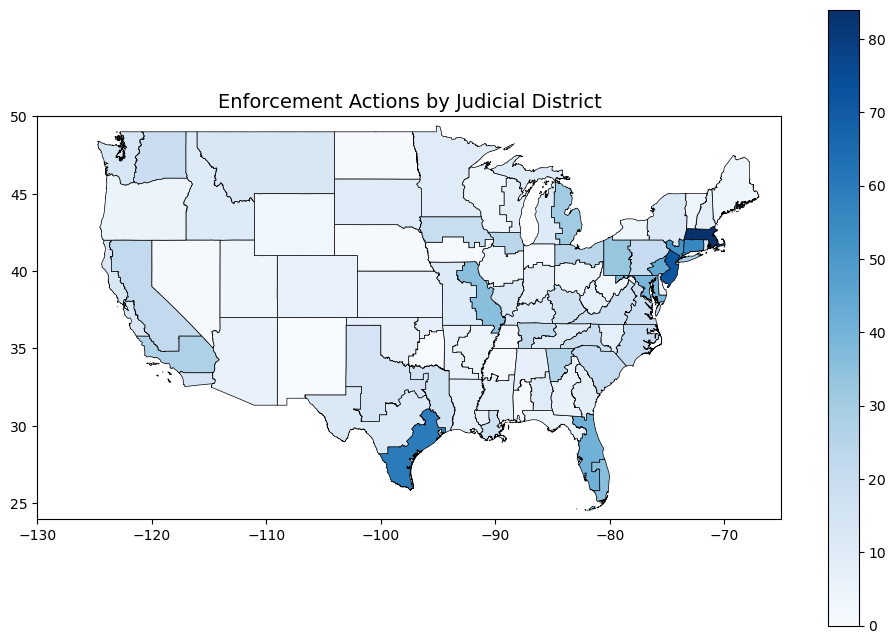

In [ ]:
ig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size
gdf.plot(
    column='Enforcement Actions', 
    cmap='Blues', 
    legend=True, 
    ax=ax,
    edgecolor='black',  # Add borders for clarity
    linewidth=0.5
)
ax.set_title('Enforcement Actions by Judicial District', fontsize=14)
ax.set_xlim([-130, -65])  # Longitude range for U.S.
ax.set_ylim([24, 50])     # Latitude range for U.S.
plt.show()

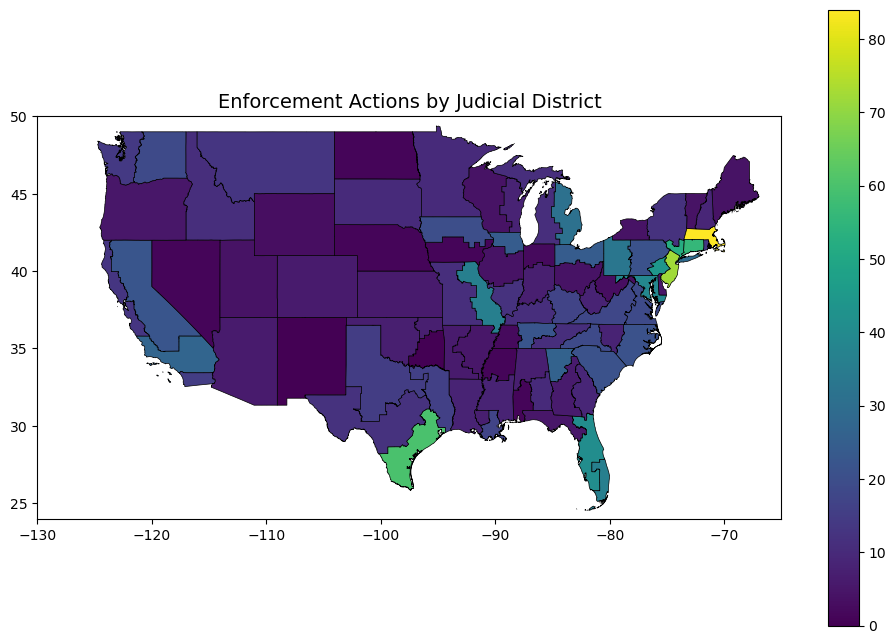

In [ ]:
ig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size
gdf.plot(
    column='Enforcement Actions', 
    cmap='viridis', 
    legend=True, 
    ax=ax,
    edgecolor='black',  # Add borders for clarity
    linewidth=0.5)
ax.set_title('Enforcement Actions by Judicial District', fontsize=14)
#Removed Alska as it made the graph look horrible
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])
plt.show()